In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
car=pd.read_csv(r'C:\Users\sreejayan\Desktop\assignment\car_age_price.csv')

In [3]:
car.head(20)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [4]:
car

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
car.shape

(112, 2)

In [8]:
car.isnull().sum()

Year     0
Price    0
dtype: int64

<Axes: >

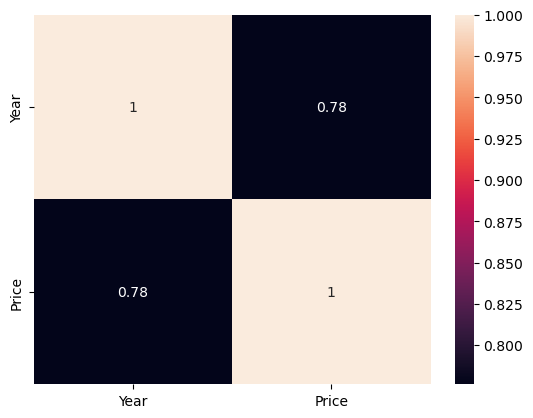

In [9]:
corrmatrix=car.corr()
sns.heatmap(corrmatrix,annot=True)

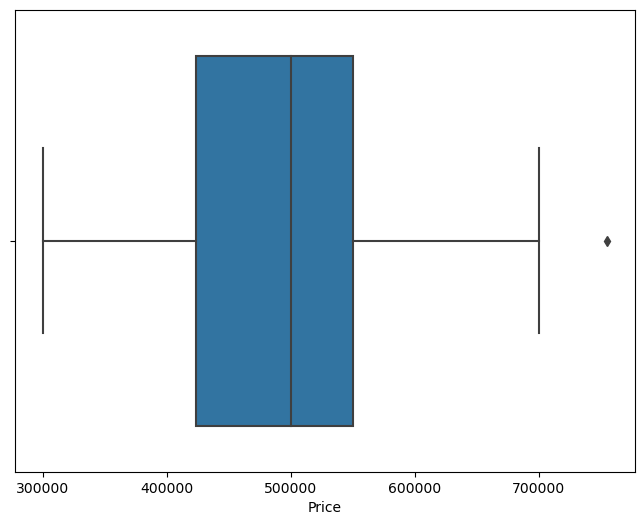

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=car["Price"])
plt.show()


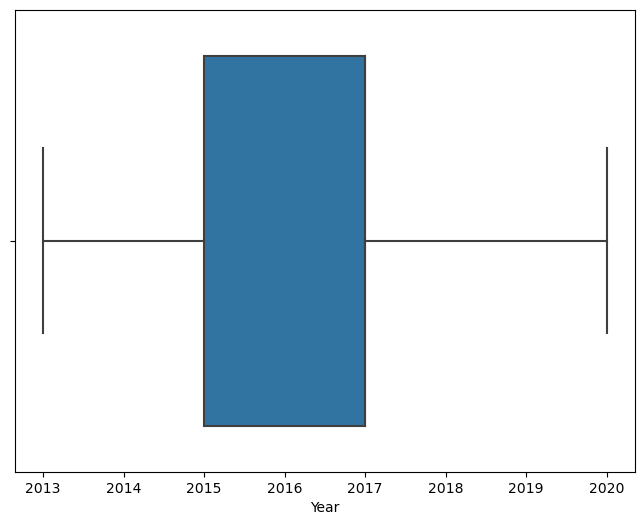

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=car["Year"])
plt.show()


In [12]:
# Filter the dataset to get car prices greater than 700,000
filtered_car = car[car['Price'] > 700000]

# Print the filtered car prices
print(filtered_car['Price'])

1    755000
Name: Price, dtype: int64


In [13]:
car = car.drop(1)

In [14]:
car

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# To find the  linear relationship between the year and price in the given dataset, we can use linear regression

In [15]:
# Separate the year and price columns
year = car['Year'].values.reshape(-1, 1)
price = car['Price'].values

Split the data into training and testing sets: Split the dataset into training and testing sets to evaluate the models' performance.

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(year, price, test_size=0.2, random_state=42)


Train and evaluate the linear regression model:

In [17]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using linear regression
linear_predictions = linear_model.predict(X_test)

# Calculate RMSE for linear regression
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))


To calculate the R-squared (coefficient of determination) value for the linear regression

In [18]:

from sklearn.metrics import r2_score

# Predict using linear regression
linear_predictions = linear_model.predict(X_test)

# Calculate R-squared for linear regression
r2_linear = r2_score(y_test, linear_predictions)

print("R-squared value (Linear Regression):", r2_linear)

R-squared value (Linear Regression): 0.7087665874512326


Train and evaluate the lasso regression model:

In [19]:
# Create and fit the lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed
lasso_model.fit(X_train, y_train)

# Predict using lasso regression
lasso_predictions = lasso_model.predict(X_test)

# Calculate RMSE for lasso regression
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))


To calculate the R-squared (coefficient of determination) value for the lasso regression 

In [20]:
from sklearn.metrics import r2_score

# Predict using lasso regression
lasso_predictions = lasso_model.predict(X_test)

# Calculate R-squared for lasso regression
r2_lasso = r2_score(y_test, lasso_predictions)

print("R-squared value (Lasso Regression):", r2_lasso)


R-squared value (Lasso Regression): 0.7087664312933915


Compare the performance of linear regression and lasso regression:

In [21]:
print("Linear Regression RMSE:", linear_rmse)
print("Lasso Regression RMSE:", lasso_rmse)
print("R-squared value (Linear Regression):", r2_linear)
print("R-squared value (Lasso Regression):", r2_lasso)


Linear Regression RMSE: 48587.415459651755
Lasso Regression RMSE: 48587.42848580974
R-squared value (Linear Regression): 0.7087665874512326
R-squared value (Lasso Regression): 0.7087664312933915


the trained models to predict the price of a 2022 model second-hand Hyundai Grand i10


In [22]:
# Predict the price of a 2022 model
year_2022 = [[2022]]

linear_predicted_price = linear_model.predict(year_2022)
lasso_predicted_price = lasso_model.predict(year_2022)

print("Predicted price for a 2022 model (Linear Regression): ₹", linear_predicted_price)
print("Predicted price for a 2022 model (Lasso Regression): ₹", lasso_predicted_price)


Predicted price for a 2022 model (Linear Regression): ₹ [704536.23267838]
Predicted price for a 2022 model (Lasso Regression): ₹ [704536.01882109]
